In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex

In [5]:
import os
key= os.getenv('IEX_PUBLIC_KEY')


# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [6]:
tickers = pd.DataFrame(get_symbols(token=key))
tickers.head()

,currency,date,exchange,iexId,isEnabled,name,region,symbol,type
0,USD,2019-10-06,NYS,IEX_46574843354B2D52,True,Agilent Technologies Inc.,US,A,cs
1,USD,2019-10-06,NYS,IEX_4238333734532D52,True,Alcoa Corp.,US,AA,cs
2,USD,2019-10-06,PSE,IEX_474B433136332D52,True,Perth Mint Physical Gold ETF,US,AAAU,et
3,USD,2019-10-06,NAS,IEX_4E5434354A302D52,True,Altaba Inc.,US,AABA,cef
4,USD,2019-10-06,NYS,IEX_4843364642592D52,True,AAC Holdings Inc.,US,AAC,cs


In [7]:
tickers = ["SPY", "AGG"]
end_date = datetime.now()
start_date = end_date + timedelta(-365)
df= get_historical_data(tickers, start_date, end_date, output_format='pandas')
df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2018-10-08  287.05  288.22  285.50  287.82   87742172  104.38  104.40  104.29   
2018-10-09  287.39  288.86  286.77  287.40   74338982  104.39  104.51  104.32   
2018-10-10  286.83  286.91  277.88  278.30  214731042  104.34  104.46  104.23   
2018-10-11  277.08  278.90  270.36  272.17  274840491  104.59  104.86  104.51   
2018-10-12  276.77  277.09  272.37  275.95  183186492  104.71  104.87  104.68   

                              
             close    volume  
date                          
2018-10-08  104.29   2267961  
2018-10-09  104.44  21903180  
2018-10-10  104.41   3834833  
2018-10-11  104.72   7053895  
2018-10-12  104.75   5017438

In [10]:
df.drop(columns=['open','high','low','volume'], level=1, inplace=True)
df.head()

,SPY,AGG
,close,close
date,,
2018-10-08,287.82,104.29
2018-10-09,287.40,104.44
2018-10-10,278.30,104.41
2018-10-11,272.17,104.72
2018-10-12,275.95,104.75


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [11]:
# Calculate the daily roi for the stocks
daily_returns = df. pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2018-10-08,NaN,NaN
2018-10-09,-0.001459,0.001438
2018-10-10,-0.031663,-0.000287
2018-10-11,-0.022027,0.002969
2018-10-12,0.013888,0.000286


In [13]:
avg_spy_daily_return= daily_returns.mean()['SPY']['close']
avg_agg_daily_return= daily_returns.mean()['AGG']['close']

In [14]:
# Calculate volatility
spy_std= daily_returns.std()['SPY']['close']
agg_std= daily_returns.std()['AGG']['close']

In [15]:
# Save the last day's closing price
spy_last_price= daily_returns['SPY']['close'][-1]
agg_last_price= daily_returns['AGG']['close'][-1]

In [21]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_trading_days = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [26]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    simulated_spy_price = [spy_last_price]
    simulated_agg_price = [agg_last_price]
    
    for i in range(number_records):
        spy_price = simulated_spy_price[-1] * (1+ np.random.normal(avg_spy_daily_return, spy_std))
        agg_price= simulated_agg_price[-1] * (1+ np.random.normal(avg_agg_daily_return, agg_std))
        
        simulated_spy_price.append(agg_price)
        simulated_agg_price.append(agg_price)
    
    monte_carlo['SPY']= pd.Series(simulated_spy_price)
    monte_carlo['AGG']= pd.Series(simulated_agg_price)
    
    simulated_daily_return= monte_carlo.pct_change()
    
    weights = [0.6,0.4]
    
    portfolio_daily_returns= simulated_daily_return.dot(weights)
    
    portfolio_cumulative_returns[x] = (1+portfolio_daily_returns.fillna(0)).cumprod()


portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.470513,0.469699,0.470842,0.469798,0.470138,0.470270,0.470549,0.470184,0.470505,0.469811,...,0.471242,0.469835,0.472960,0.472313,0.469945,0.472481,0.472755,0.470364,0.470155,0.469631
2,0.470865,0.470028,0.471673,0.470273,0.471556,0.470527,0.469932,0.470942,0.469332,0.470866,...,0.472415,0.469849,0.473699,0.472703,0.469900,0.471869,0.473707,0.469741,0.469942,0.469041
3,0.471596,0.471138,0.473250,0.471156,0.470793,0.469611,0.470083,0.471749,0.468215,0.471213,...,0.472369,0.469772,0.473338,0.472971,0.469700,0.471881,0.473966,0.469609,0.469260,0.469234
4,0.472560,0.469691,0.474050,0.470984,0.469133,0.469420,0.471071,0.473372,0.467095,0.470570,...,0.471802,0.471246,0.472807,0.472500,0.471082,0.472872,0.475733,0.470176,0.470732,0.469024


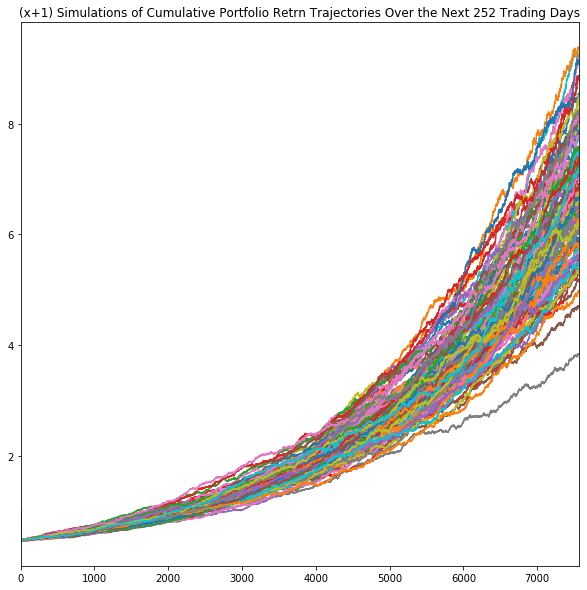

In [28]:
# Visualize the Simulation
plot_title = f'(x+1) Simulations of Cumulative Portfolio Retrn Trajectories Over the Next 252 Trading Days'
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(10,10))

In [29]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1,:]
ending_cumulative_returns.head()

0    8.554134
1    8.238658
2    6.766212
3    5.327846
4    6.911063
Name: 7560, dtype: float64

In [32]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05,0.95])
confidence_interval

0.05    5.283711
0.95    8.834135
Name: 7560, dtype: float64

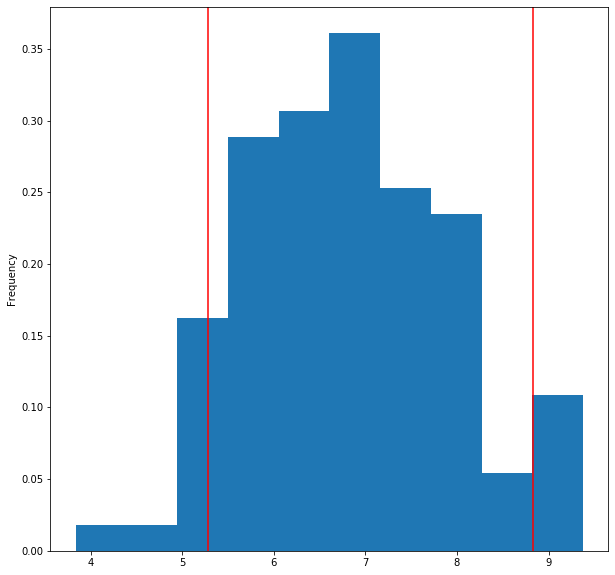

In [33]:
# Visualize the distribution of the ending returns
ending_cumulative_returns.plot.hist(density=True, bins=10, figsize=(10,10))
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [36]:
return_percentiles = ending_cumulative_returns.quantile([0.1,0.5,0.9])
return_percentiles

0.1    5.493343
0.5    6.768033
0.9    8.219090
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [39]:
initial_investment=20000


return_10 = initial_investment * (return_percentiles.iloc[0])
return_50 = initial_investment * (return_percentiles.iloc[1])
return_90 = initial_investment * (return_percentiles.iloc[2])

print(f'10th percentile: {return_10}')
print(f'50th percentile: {return_50}')
print(f'90th percentil: {return_90}')

10th percentile: 109866.85637397967
50th percentile: 135360.66607215873
90th percentil: 164381.80579317734


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [41]:
plaid_projected_annul_income = 7389

retirement_income= 0.04 * return_10

if retirement_income >= plaid_projected_annul_income: 
    print(f'There are ${retirement_income} in retirement account, which is sufficient')
else:
        print(f'There are ${retirement_income} in retirement account, which is NOT sufficient')

There are $4394.674254959186 in retirement account, which is NOT sufficient


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [42]:
retirement_income_2 = 0.04 * (return_10*1.5)

if retirement_income_2 >= plaid_projected_annul_income: 
    print(f'There are ${retirement_income} in retirement account, which is sufficient')
else:
        print(f'There are ${retirement_income} in retirement account, which is NOT sufficient')

There are $4394.674254959186 in retirement account, which is NOT sufficient


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE